# MALARIA IN AFRICA (2007-2017)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Control display of seaborn data 
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

**DATASET BEFORE CLEANING.**

In [2]:
# Loading the dataset
df = pd.read_csv(r'..\..\resources\datasets\MalariaAfricaDataset.csv')
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


**ANALYZING THE DATASET.**

In [3]:
# Checking shape of data (rows, columns)
df.shape

(594, 27)

In [4]:
# Checking column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [5]:
updated_columns = {
    'Incidence of malaria (per 1,000 population at risk)': 'Malaria_Incidence_per1000_at-risk',
    'Use of insecticide-treated bed nets (% of under-5 population)': 'Use_of_treated_bed_nets(% under 5)',
    'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)': 'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
    'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)': 'Preventive_treatmnet_in_pregnancy(% pregnant women)',
    'People using safely managed drinking water services (% of population)': 'People_using_safely_managed_drinking_water(% Total)',
    'People using safely managed drinking water services, rural (% of rural population)': 'People_using_safely_managed_drinking_water(% Rural)',
    'People using safely managed drinking water services, urban (% of urban population)': 'People_using_safely_managed_drinking_water(% Urban)',
    'People using safely managed sanitation services (% of population)': 'People_using_safely_managed_sanitation(% Total)',
    'People using safely managed sanitation services, rural (% of rural population)': 'People_using_safely_managed_sanitation(% Rural)',
    'People using safely managed sanitation services, urban  (% of urban population)': 'People_using_safely_managed_sanitation(% Urban)',
    'People using at least basic drinking water services (% of population)': 'People_using_basic_drinking_water(% Total)',
    'People using at least basic drinking water services, rural (% of rural population)': 'People_using_basic_drinking_water(% Rural)',
    'People using at least basic drinking water services, urban (% of urban population)': 'People_using_basic_drinking_water(% Urban)',
    'People using at least basic sanitation services (% of population)': 'People_using_basic_sanitation(% Total)',
    'People using at least basic sanitation services, rural (% of rural population)': 'People_using_basic_sanitaion(% Rural)',
    'People using at least basic sanitation services, urban  (% of urban population)': 'People_using_basic_sanitation(% Urban)',
}

# Rename the columns
df.rename(columns=updated_columns, inplace=True)

In [6]:
# Modified column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Malaria_Incidence_per1000_at-risk', 'Malaria cases reported',
       'Use_of_treated_bed_nets(% under 5)',
       'Children_with_fever_receiving_antimalarial_drugs(% under 5)',
       'Preventive_treatmnet_in_pregnancy(% pregnant women)',
       'People_using_safely_managed_drinking_water(% Total)',
       'People_using_safely_managed_drinking_water(% Rural)',
       'People_using_safely_managed_drinking_water(% Urban)',
       'People_using_safely_managed_sanitation(% Total)',
       'People_using_safely_managed_sanitation(% Rural)',
       'People_using_safely_managed_sanitation(% Urban)',
       'Rural population (% of total population)',
       'Rural population growth (annual %)',
       'Urban population (% of total population)',
       'Urban population growth (annual %)',
       'People_using_basic_drinking_water(% Total)',
       'People_using_basic_drinking_water(% Rural)',
       'People_using_basic_drinking_water(% Urba

In [7]:
# Checking data types
df.dtypes

Country Name                                                    object
Year                                                             int64
Country Code                                                    object
Malaria_Incidence_per1000_at-risk                              float64
Malaria cases reported                                         float64
Use_of_treated_bed_nets(% under 5)                             float64
Children_with_fever_receiving_antimalarial_drugs(% under 5)    float64
Preventive_treatmnet_in_pregnancy(% pregnant women)            float64
People_using_safely_managed_drinking_water(% Total)            float64
People_using_safely_managed_drinking_water(% Rural)            float64
People_using_safely_managed_drinking_water(% Urban)            float64
People_using_safely_managed_sanitation(% Total)                float64
People_using_safely_managed_sanitation(% Rural)                float64
People_using_safely_managed_sanitation(% Urban)                float64
Rural 

In [8]:
# Checking for basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country Name                                                 594 non-null    object 
 1   Year                                                         594 non-null    int64  
 2   Country Code                                                 594 non-null    object 
 3   Malaria_Incidence_per1000_at-risk                            550 non-null    float64
 4   Malaria cases reported                                       550 non-null    float64
 5   Use_of_treated_bed_nets(% under 5)                           132 non-null    float64
 6   Children_with_fever_receiving_antimalarial_drugs(% under 5)  122 non-null    float64
 7   Preventive_treatmnet_in_pregnancy(% pregnant women)          106 non-null    flo

In [9]:
# Check null values
df.isnull().sum().sort_values(ascending = False)

People_using_safely_managed_drinking_water(% Rural)            506
People_using_safely_managed_drinking_water(% Total)            495
Preventive_treatmnet_in_pregnancy(% pregnant women)            488
People_using_safely_managed_sanitation(% Rural)                484
Children_with_fever_receiving_antimalarial_drugs(% under 5)    472
People_using_safely_managed_sanitation(% Urban)                462
People_using_safely_managed_sanitation(% Total)                462
Use_of_treated_bed_nets(% under 5)                             462
People_using_safely_managed_drinking_water(% Urban)            418
Malaria cases reported                                          44
Malaria_Incidence_per1000_at-risk                               44
People_using_basic_sanitation(% Urban)                          28
People_using_basic_drinking_water(% Rural)                      28
People_using_basic_drinking_water(% Urban)                      28
People_using_basic_sanitaion(% Rural)                         

In [10]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [11]:
""" 
I filled both the malaria cases reported and incidence of malaria columns with 0s because the two columns each has 44 nulls , 
since each country appears 11 times, there are 4 countries with nulls throughout the 11 years. Therefore I couldn't calculate the mean.
Alos I could not just assume any value to be filled in all the 11 spaces for each country. 
"""
df['Malaria cases reported'].fillna(0, inplace=True)
df['Malaria_Incidence_per1000_at-risk'].fillna(0, inplace=True)

**Confirmation that the two columns now have no nulls.**

In [12]:
df['Malaria cases reported'].isnull().sum()

0

In [13]:
df['Malaria_Incidence_per1000_at-risk'].isnull().sum()

0

**Handling nulls by filling the missing values with the mean of the rows that have data for each particular country.**

In [14]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitaion(% Urban)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(sudan_means)

In [15]:
sudan_means = df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
sudan_data_rows = df.loc[df['Country Name'] == 'South Sudan'].dropna(subset=['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitaion(% Urban)']] = df.loc[
    df['Country Name'] == 'South Sudan', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(sudan_means)

In [16]:
car_means = df.loc[df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 
                                                'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']].mean()

# Filter out the rows that have data
car_data_rows = df.loc[df['Country Name'] == 'Central African Republic'].dropna(subset=['People_using_basic_drinking_water(% Total)', 
                                                'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)'])

# Fill the rows that don't have data with the mean values
df.loc[df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']] = df.loc[
    df['Country Name'] == 'Central African Republic', ['People_using_basic_drinking_water(% Total)', 'People_using_basic_sanitation(% Total)',
                                                'People_using_basic_drinking_water(% Rural)',
                                                'People_using_basic_drinking_water(% Urban)',
                                                'People_using_basic_sanitaion(% Rural)',
                                                'People_using_basic_sanitation(% Urban)']
].fillna(car_means)

I filled the remaining nulls available with zero because the columns still having nulls have over 75% of the data with nulls.
Calculating mean like the code earlier would give nulls, since for some particular countries, all the 11 times they appear have nulls.

In [17]:
# Replace NaN with zero
df.fillna(0, inplace=True)

**Confirmation that all columns now have no nulls.**

In [18]:
df.isnull().sum().sort_values(ascending = False) 

Country Name                                                   0
Year                                                           0
geometry                                                       0
longitude                                                      0
latitude                                                       0
People_using_basic_sanitation(% Urban)                         0
People_using_basic_sanitaion(% Rural)                          0
People_using_basic_sanitation(% Total)                         0
People_using_basic_drinking_water(% Urban)                     0
People_using_basic_drinking_water(% Rural)                     0
People_using_basic_drinking_water(% Total)                     0
Urban population growth (annual %)                             0
Urban population (% of total population)                       0
Rural population growth (annual %)                             0
Rural population (% of total population)                       0
People_using_safely_manag

In [19]:
df.dtypes

Country Name                                                    object
Year                                                             int64
Country Code                                                    object
Malaria_Incidence_per1000_at-risk                              float64
Malaria cases reported                                         float64
Use_of_treated_bed_nets(% under 5)                             float64
Children_with_fever_receiving_antimalarial_drugs(% under 5)    float64
Preventive_treatmnet_in_pregnancy(% pregnant women)            float64
People_using_safely_managed_drinking_water(% Total)            float64
People_using_safely_managed_drinking_water(% Rural)            float64
People_using_safely_managed_drinking_water(% Urban)            float64
People_using_safely_managed_sanitation(% Total)                float64
People_using_safely_managed_sanitation(% Rural)                float64
People_using_safely_managed_sanitation(% Urban)                float64
Rural 

**Changing the data type of the malaria cases reported to int.**

In [20]:
df['Malaria cases reported'] = df['Malaria cases reported'].astype('int')

**Analyzing the correlation between the columns.**

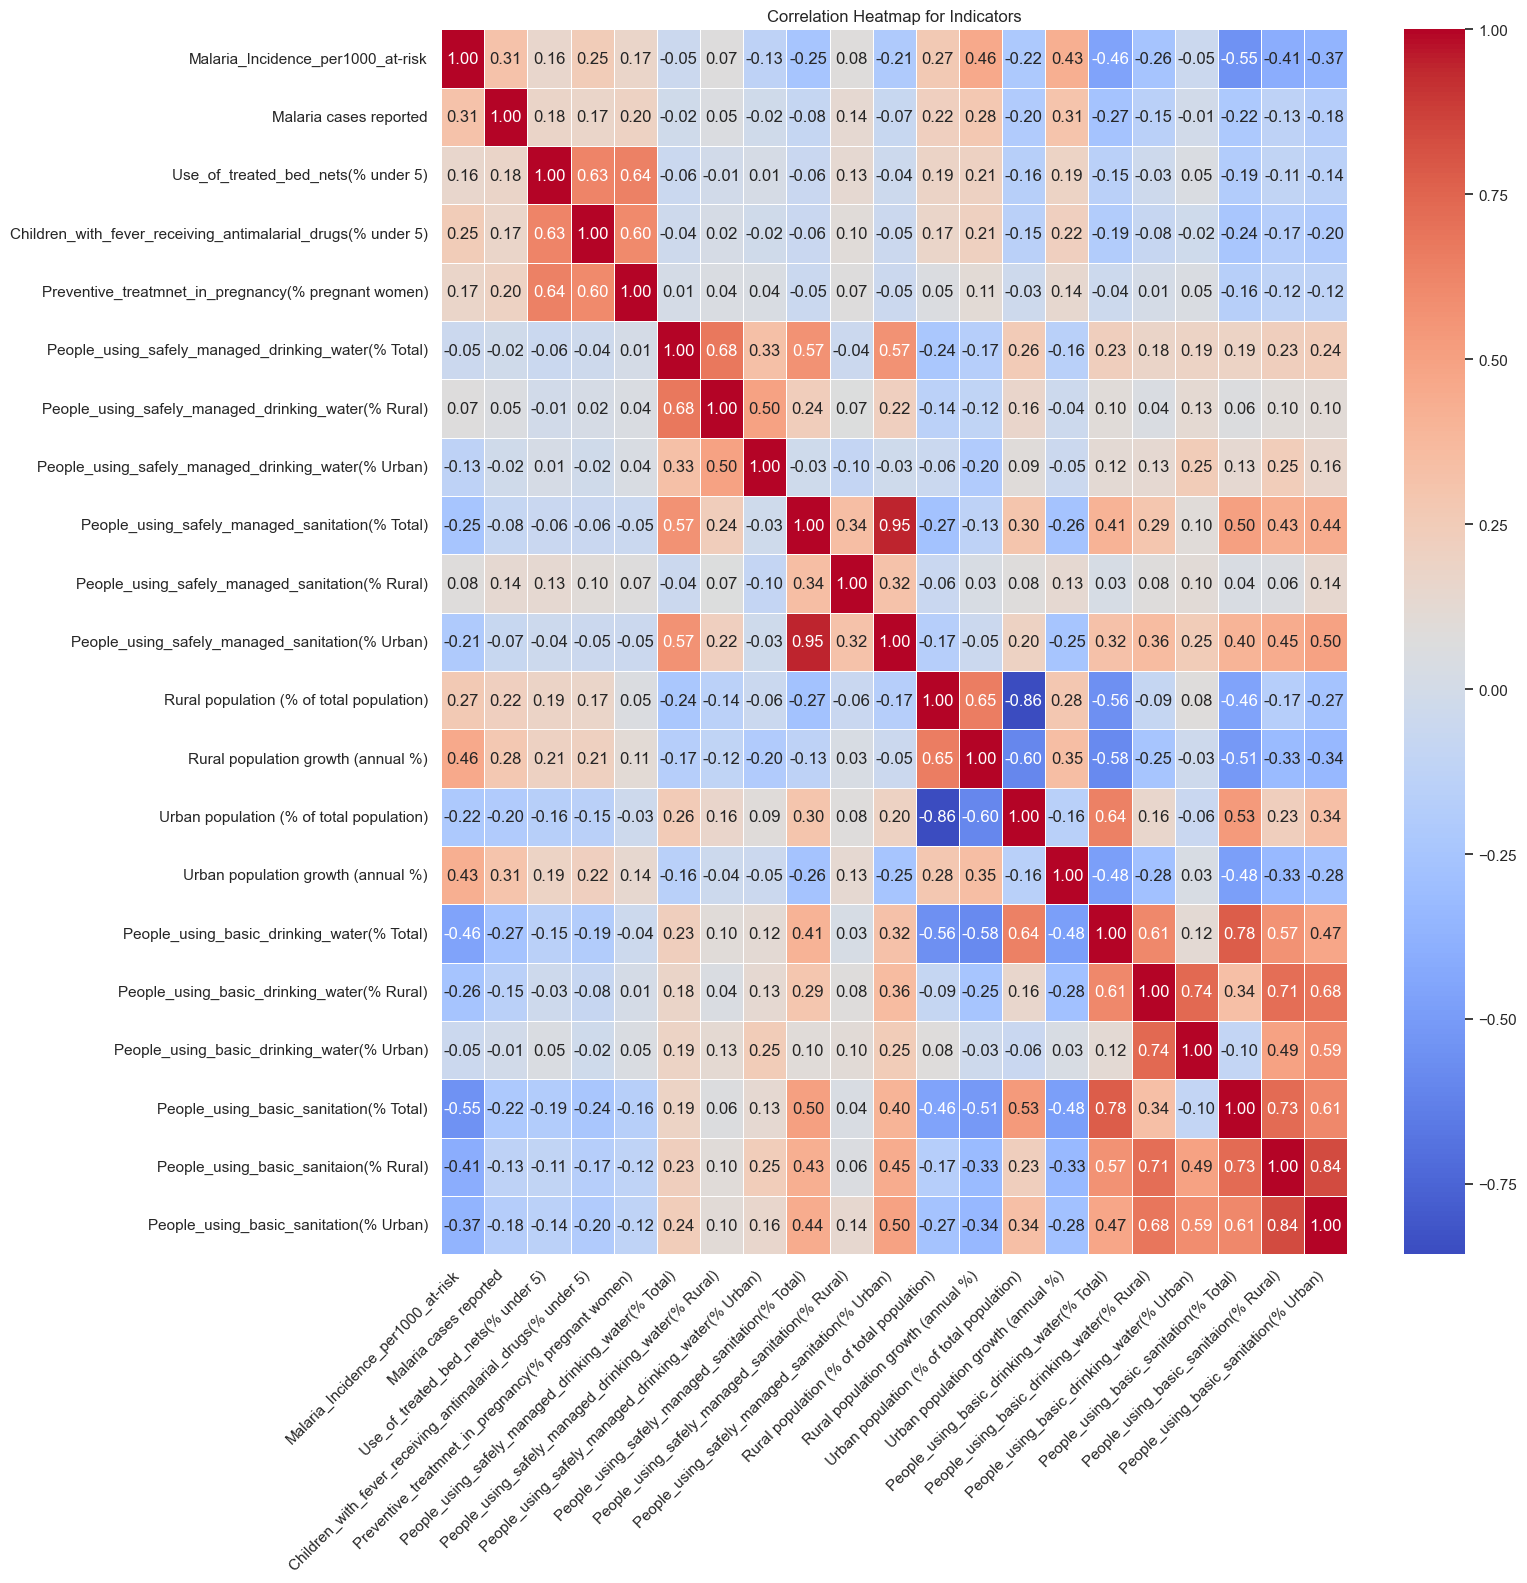

In [21]:
# Filter only the necessary columns
heatmap_data = df.iloc[:, 3:24]

# Compute the correlation matrix
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Analyze the reported number of malaria cases to understand the burden of malaria in different countries and over time.**

In [22]:
# Filter out Year and Malaria cases reported.
malaria_cases = df[['Year', 'Malaria cases reported']]
malaria_cases

,Year,Malaria cases reported
0,2007,26
1,2007,1533485
2,2007,0
3,2007,390
4,2007,44246
...,...,...
589,2017,1755577
590,2017,0
591,2017,11667831
592,2017,5505639


In [23]:
# Get total malaria cases per year and highlighting a year with maximum total cases.
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if cell else '' for cell in is_max]

def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: maroon' if cell else '' for cell in is_min]

totalmalaria_cases = malaria_cases.groupby('Year').sum()

totalmalaria_cases.style.apply(highlight_max)

,Malaria cases reported
Year,
2007,10102341
2008,9508374
2009,14414616
2010,22184760
2011,23002865
2012,39719221
2013,47174959
2014,77028814
2015,92968526


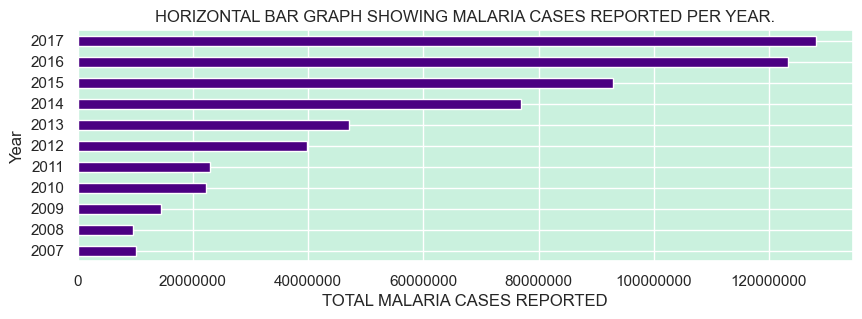

In [24]:
malaria_cases_bar = totalmalaria_cases.plot(kind='barh', align='center', figsize=(10,3), color='indigo', legend =False,
                            title="HORIZONTAL BAR GRAPH SHOWING MALARIA CASES REPORTED PER YEAR.")
# Remove scientific notation from x-axis
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

**FURTHER ANALYSIS ON YEAR 2017.**

We chose 2017 because it has the highest number of malaria cases reported so it is good for analysis. It can also be used to predict what the values for the next year 2018 will be.

In [25]:
yearGroups = df.groupby(['Year'])

year2017 = yearGroups.get_group(2017)
year2017.reset_index(drop=True, inplace=True)
year2017.head()

,Country Name,Year,Country Code,Malaria_Incidence_per1000_at-risk,Malaria cases reported,Use_of_treated_bed_nets(% under 5),Children_with_fever_receiving_antimalarial_drugs(% under 5),Preventive_treatmnet_in_pregnancy(% pregnant women),People_using_safely_managed_drinking_water(% Total),People_using_safely_managed_drinking_water(% Rural),People_using_safely_managed_drinking_water(% Urban),People_using_safely_managed_sanitation(% Total),People_using_safely_managed_sanitation(% Rural),People_using_safely_managed_sanitation(% Urban),Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People_using_basic_drinking_water(% Total),People_using_basic_drinking_water(% Rural),People_using_basic_drinking_water(% Urban),People_using_basic_sanitation(% Total),People_using_basic_sanitaion(% Rural),People_using_basic_sanitation(% Urban),latitude,longitude,geometry,People_using_basic_sanitaion(% Urban)
0,Algeria,2017,DZA,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,17.69,20.79,16.48,27.95,-0.05,72.05,2.87,93.56,88.69,95.44,87.59,82.21,89.67,28.033886,1.659626,POINT (28.033886 1.659626),0.0
1,Angola,2017,AGO,228.91,3874892,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,35.16,1.38,64.84,4.39,55.84,27.44,71.24,49.88,23.23,64.33,-11.202692,17.873887,POINT (-11.202692 17.873887),0.0
2,Benin,2017,BEN,399.56,1774022,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,53.23,1.74,46.77,3.91,66.41,58.22,75.75,16.45,7.62,26.51,9.307690,2.315834,POINT (9.307689999999999 2.315834),0.0
3,Botswana,2017,BWA,2.05,1900,0.0,0.0,0.0,0.0,0.0,83.22,0.00,0.00,0.00,31.30,-0.35,68.70,3.19,90.34,75.53,97.09,77.27,50.60,89.42,-22.328474,24.684866,POINT (-22.328474 24.684866),0.0
4,Burkina Faso,2017,BFA,399.94,10255415,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,71.26,2.04,28.74,5.03,47.89,34.99,79.86,19.40,11.34,39.38,12.238333,-1.561593,POINT (12.238333 -1.561593),0.0


In [26]:
# Filter out the malaria cases repoted per country in 2017.
cases2017 = year2017[['Country Name', 'Malaria cases reported']].sort_values(by='Malaria cases reported',ascending=False)
cases2017.head(10)

,Country Name,Malaria cases reported
11,"Congo, Dem. Rep.",16793002
51,Uganda,11667831
38,Nigeria,11639713
4,Burkina Faso,10255415
35,Mozambique,9892601
5,Burundi,8453810
22,Ghana,5584185
52,Zambia,5505639
48,Tanzania,5354819
30,Malawi,4901344


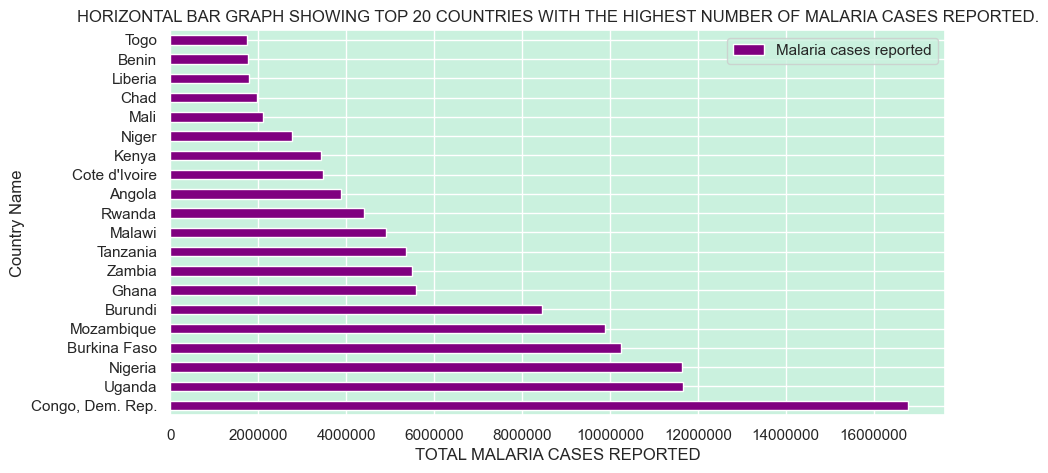

In [27]:
# Plotting top 20 countries with the highest number of malaria cases reported. (year2017)
# These countries form a basis of the countries that need aid from the health organizations.

cases2017.head(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='purple', figsize=(10,5), 
                        title='HORIZONTAL BAR GRAPH SHOWING TOP 20 COUNTRIES WITH THE HIGHEST NUMBER OF MALARIA CASES REPORTED.')
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

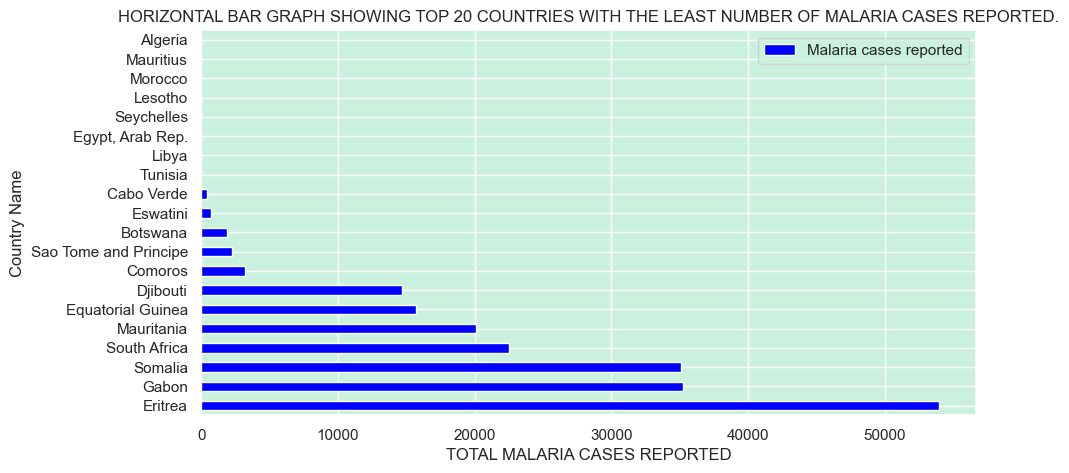

In [28]:
# Plotting top 20 countries with the least number of malaria cases reported. (year2017)
# These countries can be used as a bench mark and highly affected countries can ask for advice from them about how they are able to control the disease.

cases2017.tail(20).plot(kind='barh', x='Country Name', y='Malaria cases reported', align='center', color='BLUE', figsize=(10,5), 
                        title='HORIZONTAL BAR GRAPH SHOWING TOP 20 COUNTRIES WITH THE LEAST NUMBER OF MALARIA CASES REPORTED.')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('TOTAL MALARIA CASES REPORTED')
plt.show()

**Explore the trends and patterns of malaria incidence by identifying countries with high and low malaria incidence rates.**

In [29]:
# Filter out the number of people at risk of getting malaria per country in 2017.
at_risk = year2017[['Country Name', 'Malaria_Incidence_per1000_at-risk']]
at_risk.head()

,Country Name,Malaria_Incidence_per1000_at-risk
0,Algeria,0.00
1,Angola,228.91
2,Benin,399.56
3,Botswana,2.05
4,Burkina Faso,399.94


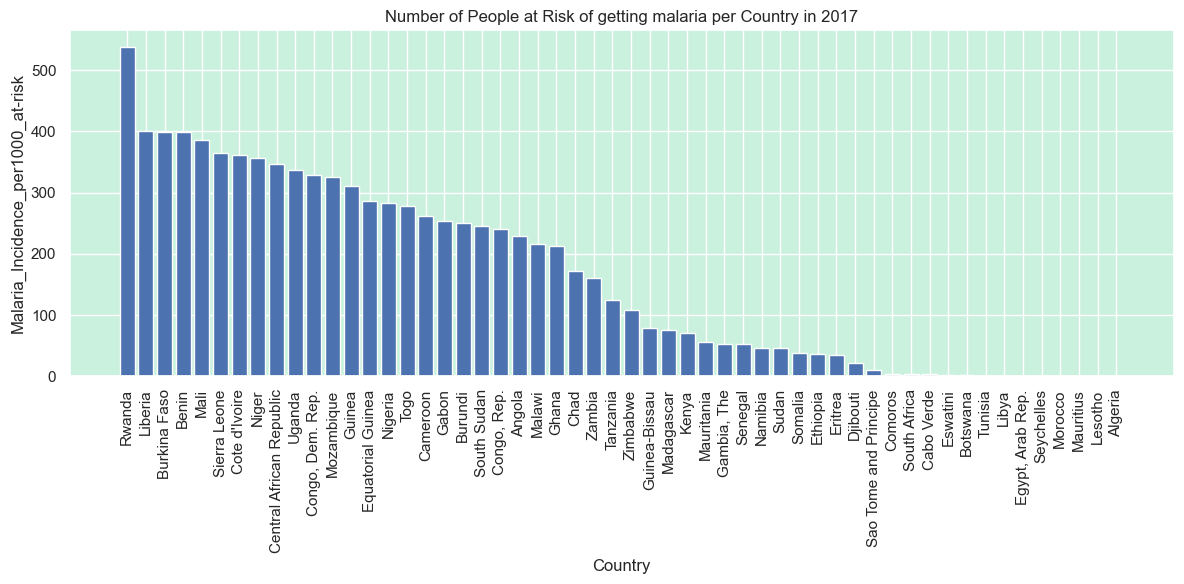

In [30]:
plt.figure(figsize=(12, 6))  

# Sorting the data by incidence in descending order to get a more informative plot
at_risk_sorted = at_risk.sort_values(by='Malaria_Incidence_per1000_at-risk', ascending=False)

plt.bar(at_risk_sorted['Country Name'], at_risk_sorted['Malaria_Incidence_per1000_at-risk'])
plt.xticks(rotation=90)  

plt.xlabel('Country')
plt.ylabel('Malaria_Incidence_per1000_at-risk')
plt.title('Number of People at Risk of getting malaria per Country in 2017')
plt.tight_layout()

plt.show()